#### Author: Wade Bryson
#### GitHub: https://github.com/WadeBryson
#### Class: 44-608 Data Analytics Fundamentals
#### Module 6 Project 6: Tell Your Own Story with Data

# **<p style="text-align: center;">North Andrew Boys Basketball</p>**
### *<p style="text-align: center;">A Statistical Analysis of the Post Hudl Era</p>*
***

## **North Andrew Background Information**

<img align="right" width="125" height="125" src="https://static.hudl.com/users/temp/5021822_b3d38657e36a4706b8bff82999688cdc.gif">

##### North Andrew is a small school district located along Highway 71 at Rosendale, MO. North Andrew’s constituents live in the small towns of Bolckow, Rosendale, Fillmore, and their surrounding rural areas. North Andrew’s Boys Basketball program has season statistics dating back to 1967. North Andrew kept primitive, basic stats for years but their ability to keep and analyze their stats improved dramatically in the 2014-2015 season when they purchased Hudl. Hudl is a subscription based service that ties real time data analysis with video footage and produces advanced statistics that are easily accessible. With all of this information readily available, high school programs that have found ways to read, analyze, and then implement strategies using their statistics have thrived.



## **Part 1 - Initial Look at Data Set**

##### For years North Andrew only kept track of points scored, three pointers made, and free throws. Now, with help from Hudl, we keep track of all kinds of different statistics. Let’s take a look at the Post-Hudl Era Database below.

In [1]:
import pandas as pd
Hudl_Era = pd.read_csv('Post_Hudl_Era_Stats.csv')

# By default pandas only shows a few columns on the right and a few at the end. We want to change the default settings so it shows all columns.
pd.set_option('display.max_columns', None)
Hudl_Era.head(7)

,Athletes,Year,Grade,GP,eFG%,VPS,FGM,FGA,FG%,2FGM,2FGA,2FG%,3FGM,3FGA,3FG%,FTM,FTA,FT%,PF,PPG,+/-,MINS,SCP,PiP,OREB,DREB,REB,AST,TO,A/TO,STL,BLK,FOUL,CHG
0,Tanner McDaniel,2020-2021,12th,32,0.61,1.30,273,528,0.52,177,271,0.65,96,257,0.37,95,122,0.78,737,23.0,319,946,82,306,36,78,114,88,114,0.77,66,9,69,0
1,Levi Linville,2018-2019,12th,25,0.69,1.90,175,254,0.69,175,253,0.69,0,1,0.00,92,146,0.63,442,17.7,349,584,122,346,110,86,196,30,40,0.75,39,9,64,1
2,Owen Graham,2021-2022,12th,28,0.50,1.69,187,379,0.49,186,367,0.51,1,12,0.08,89,145,0.61,464,16.6,109,861,99,356,97,257,354,113,93,1.22,26,96,68,0
3,Ryan Hughes,2016-2017,11th,31,0.58,1.90,101,215,0.47,54,113,0.48,47,102,0.46,82,100,0.82,331,10.7,285,376,26,90,12,38,50,145,54,2.69,45,3,25,1
4,Tanner McDaniel,2019-2020,11th,25,0.51,1.15,166,359,0.46,129,233,0.55,37,126,0.29,72,104,0.69,441,17.6,197,681,51,216,50,75,125,68,80,0.85,44,21,72,0
5,Braxon Linville,2021-2022,9th,26,0.51,1.12,104,213,0.49,96,192,0.50,8,21,0.38,67,110,0.61,283,10.9,144,746,49,192,80,79,159,49,78,0.63,23,0,53,1
6,Caleb Patterson,2016-2017,11th,29,0.60,1.66,153,259,0.59,151,254,0.59,2,5,0.40,60,97,0.62,368,12.7,308,350,111,292,96,109,205,36,30,1.20,33,17,71,2


In [2]:
# Displaying the amount of athletes in the Database (# Rows)
numb_athletes = len(Hudl_Era)
print ("Number of Athletes:", numb_athletes)

# Displaying the amount of columns in the Database
numb_columns = len(Hudl_Era.columns)
print ("Number of Columns:", numb_columns)

Number of Athletes: 144
Number of Columns: 34


##### The Post-Hudl Era Database has three columns containing categorical information about a player; their name, the year, and their grade. It also has 31 columns containing different numeric statistics accumulated throughout the season. This drastic increase in information available has forever changed the North Andrew Boys’ Basketball Program.

## **Part 2 - Impact of Modern Statistics**

#### **Value Points System (VPS)** 

##### Let’s now dive into some of the new advanced statistics that we track. The first one we will focus on is the Value Points System, “VPS”. The Value Points System gives points for statistics that are widely accepted as being positive outcomes (Points + Rebounds + 2*(Assists + Charges + Steals + Blocks)). It then divides this number by a number that gives points for negative statistics (FT Misses + 2*(Misses + Fouls + Turnovers)). With this formula a VPS of 1 is considered average. Let’s look at some basic statistics with the North Andrew Boys’ Basketball Program and our VPS.

In [3]:
# Setting the precision to 2 decimal places
pd.set_option("display.precision", 2)

Hudl_Era['VPS'].describe()

count    144.00
mean       1.20
std        0.96
min        0.00
25%        0.88
50%        1.12
75%        1.37
max        9.00
Name: VPS, dtype: float64

##### As with most statistics, there are some flaws with the Value Points System. Athletes that play very little minutes can really have their VPS score inflated. Overall, both of our mean and median are pretty significantly above the standardized average of 1.0 which is really good.


#### **Plus - Minus (+/-)**

##### Now let's take a look at **MY FAVORITE** stat, plus-minus. Plus-minus is an integer that represents the score differential while an athlete was on the court. At the small school level, it is not realistic for us to expect every single athlete to be a great scorer, rebounder, or ball handler. But we do expect every athlete to compete and the plus-minus stat is purely a representation of how much we outscored or got outscored while that player was on the floor. Let’s look at the top 10 plus-minus values with North Andrew Boys’ Basketball Program and their respective stats that season.

In [4]:
clean_PM = Hudl_Era[["Athletes", "Year", "Grade", "+/-"]]
clean_PM.nlargest(10, '+/-')

,Athletes,Year,Grade,+/-
11,Ryan Hughes,2017-2018,12th,613
7,Caleb Patterson,2017-2018,12th,583
19,Jacob Powelson,2017-2018,12th,533
13,Lance Streeby,2017-2018,12th,530
40,Cole Thorburn,2017-2018,12th,394
38,Drake Simmons,2018-2019,12th,390
1,Levi Linville,2018-2019,12th,349
53,Aidan DeLong,2017-2018,12th,343
47,Ryan Shultz,2017-2018,12th,339
44,Jaden Baker,2018-2019,11th,321


##### Notice how 7 of the top 10 values all happened from athletes in the 2017-2018 season. That team had the best record in North Andrew History (29-1). They finished 3rd at the Class 1 Final Four. We've looked at VPS and PLus-Minus as a statistic after the season completes. I cannot overstate how important those stats are to our coaching staff in real time during the season. We call both of those advanced statistics "Winning Statistics". When we are making playing time or personnel decisions we heavily rely on these "Winning Statistics".

<img align="center" width="1228" height="644" src="2018-2019.jpg">


## **Part 3 - Focus on Efficiency**

##### At North Andrew, we **LOVE** the 3-Point Shot. Let’s take a look at our 3-point shooting totals.

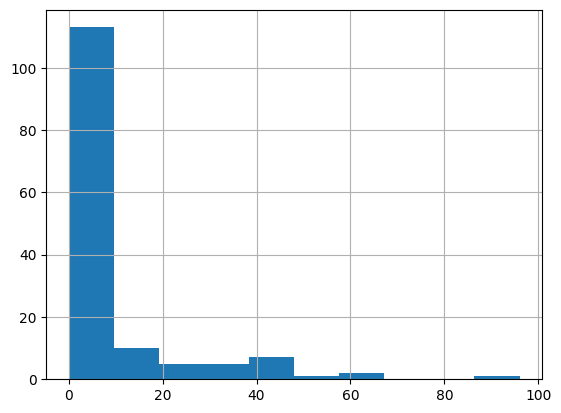

In [5]:
%matplotlib inline
histogram = Hudl_Era["3FGM"].hist()

##### Notice that a majority of our athletes don't make a large amount of 3s, but the ones that do are making them at a very high rate. There are all kinds of studies out there that prove the value of the 3-point shot to your basketball program and I won't spend a whole bunch of time elaborating on it. But they all break down to the following fact: Shooting a 3 at 33.3% is equivalent in points per shot to shooting a 2 at 50%. This leads me to another advanced statistic that I love, **eFG%**. **Effective Field Goal Percentage** takes into account that a 3-point shot is worth more than a 2-point shot and it adjusts the percent to accomodate for that. Let's look at a histogram of our eFG% from every athlete in the database.

In [7]:
# Filter athletes out that took less than 15 shots. If we don't do this the last will be dominated by Freshman that went 2 for 2 on the year.
eFG_Filtered = Hudl_Era[Hudl_Era['FGA']>= 15]

clean_eFG = eFG_Filtered[["Athletes", "Year", "Grade", "eFG%", "FG%", "2FG%", "3FG%"]]
clean_eFG.nlargest(10, 'eFG%')

,Athletes,Year,Grade,eFG%,FG%,2FG%,3FG%
1,Levi Linville,2018-2019,12th,0.69,0.69,0.69,0.00
56,Levi Linville,2017-2018,11th,0.66,0.66,0.66,0.00
60,Levi Linville,2016-2017,10th,0.65,0.65,0.65,0.00
17,Aidan DeLong,2016-2017,11th,0.63,0.62,0.63,0.40
47,Ryan Shultz,2017-2018,12th,0.62,0.60,0.62,0.38
67,Keenan Shunk,2018-2019,11th,0.62,0.62,0.73,0.00
0,Tanner McDaniel,2020-2021,12th,0.61,0.52,0.65,0.37
13,Lance Streeby,2017-2018,12th,0.61,0.52,0.64,0.39
6,Caleb Patterson,2016-2017,11th,0.60,0.59,0.59,0.40
11,Ryan Hughes,2017-2018,12th,0.60,0.49,0.53,0.44
